In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def loadData(filename, sep, header): #data loader using pandas
    df = pd.read_table(filename,sep=sep,header=header)
    df = df.fillna(df.mean()) #set NaN values to mean
    return np.array(df) #convert to a numpy array (matrix)

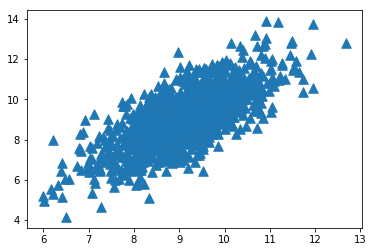

In [3]:
X = loadData('testSet.txt',sep='\t',header=None) #delimiter is Tab, no header
X = X.T  #convert to column-wise

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X[0,:], X[1,:], marker='^', s=90)
plt.show()

Exercise 1-1: Complete the PCA code (covariance matrix)

In [4]:
def PCA(X): #we assume that sample is given in column-wise manner
    ndata = X.shape[1]
    meanVec = np.mean(X, axis=1)
    meanVec = meanVec.reshape(-1,1) #convert to column vector
    Xc = X - meanVec
    covMat = np.dot(Xc, Xc.T)/ndata
    #covMat = np.dot(X, X.T)/ndata - np.dot(meanVec, meanVec.T)

    eigVals,eigVects = np.linalg.eig(covMat)
    eigValInd = np.argsort(-eigVals)        #sort in descending order
    eigVects = eigVects[:,eigValInd]       #reorganize eigen vectors 
    eigVals = eigVals[eigValInd]        
    return eigVals, eigVects

Exercise 1-2: Complete the code for reconstruction

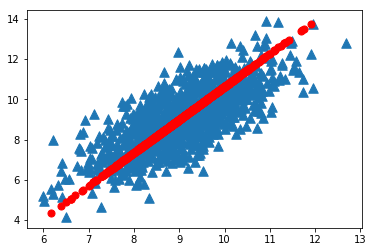

In [5]:
ndim=1  #number of desired principal components (what happens when ndim=2 ?)
Lambda, A = PCA(X)
meanVec = np.mean(X, axis=1)
meanVec = meanVec.reshape(-1,1) 
lowX = np.dot(A[:,:ndim].T, X - meanVec).reshape(ndim,-1) #transform data into new dimension
reconMat = np.dot(A[:,:ndim], lowX) + meanVec #reconstructed data

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X[0,:], X[1,:], marker='^', s=90)
ax.scatter(reconMat[0,:], reconMat[1,:], marker='o', s=50, c='red')
plt.show()

Note that eigenvectors are unit normalized and mutually orthogonal.

In [6]:
print(np.dot(A.T,A))

[[ 1.  0.]
 [ 0.  1.]]


Exercise 2: Write PCA using auto-correlation matrix and compare the results.

In [7]:
def PCA2(X): #we assume that sample is given in column-wise manner
    ndata = X.shape[1]
    corMat = np.dot(X, X.T)/ndata
    eigVals,eigVects = np.linalg.eig(corMat)
    eigValInd = np.argsort(-eigVals)        #sort in descending order
    eigVects = eigVects[:,eigValInd]       #reorganize eigen vectors
    eigVals = eigVals[eigValInd] 
    return eigVals, eigVects

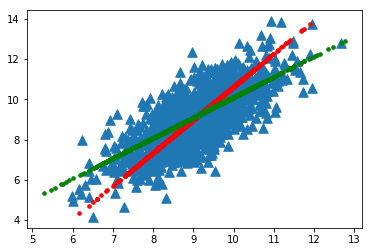

In [8]:
Lambda, B = PCA2(X)
lowX2 = np.dot(B[:,:ndim].T, X).reshape(ndim,-1)
reconMat2 = np.dot(B[:,:ndim], lowX2)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X[0,:], X[1,:], marker='^', s=90)
ax.scatter(reconMat[0,:], reconMat[1,:], marker='.', s=50, c='red')
ax.scatter(reconMat2[0,:], reconMat2[1,:], marker='.', s=50, c='green')
plt.show()

Let's tests on high-dimensional data.

In [9]:
X = loadData('secom.data',sep=' ',header=None) #delimiter is space, no header
X = X.T
print(X.shape)

(590, 1567)


In [10]:
Lambda, A = PCA(X)

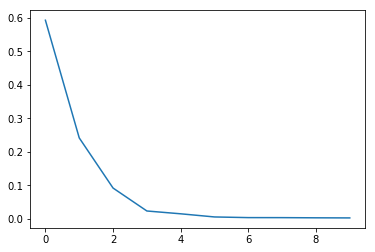

In [11]:
plt.plot(Lambda[:10]/np.sum(Lambda)) 
plt.show()